# Challenge titanic 

Lien du challenge : https://www.kaggle.com/c/titanic/data

## I. Introdcution

Le jeu de données est constitué: 
* variable à expliquée : 
    - survived : 1 signifie "survived" et 0 signifie "non survived"
    
    
    
* de 11 variables explicatives : 
    - PassegerId : l'identité d'un passagé 
    - Pclass : Classe de billet. 1 correspond à un billet de première classe. 2 signifie billet de deuxième classe. 3 signifie billet de troisième classe.
    - Name : Nom du passager. Le nom contient également le titre. "Monsieur" pour homme. "Mme" pour une femme. "Mademoiselle" pour une fille. "Maître" pour garçon.
    - Sex : Sexe du passager. C'est soit masculin, soit féminin.
    - Age: Âge du passager. Les valeurs "NaN" dans cette colonne indiquent que l'âge de ce passager particulier n'a pas été enregistré.
    - SibSp : Nombre de frères et sœurs ou de conjoints voyageant avec chaque passager.
    - Parch : Nombre de parents d'enfants voyageant avec chaque passager.
    - ticket : Numéro du billet.
    - Fare : Tarif du passager. 
    - Cabin : Numéro de la cabine du passager. Les valeurs "NaN" dans cette colonne indiquent que le numéro de cabine de ce passager particulier n'a pas été enregistré.
    - Embarked : Porte d'embarquement

    
        

## II. Objectifs

Créer des modèles qui préditent quels passagers ont survécu au naufrage du Titanic.

## III. Imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

## IV. Chargement de données

In [2]:
train =pd.read_csv("/Users/sariakarandrianjanahary/Desktop/challenge_titanic_sariaka/titanic/train.csv",dtype={"Age": np.float64},)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## V. Exploitation de données

### V.1. Déscription de données 

In [4]:
# taille de notre données 
train.shape

(891, 12)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* variables catégorielles : Survived, Sex, and Embarked. 
* variables Ordinales: Pclass.
* variables numériques Continues: Age, Fare. 
* variable numérique discète: SibSp, Parch.

### V.2. Distribution des données 

In [7]:
# Distribution des variables
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hawksford, Mr. Walter James",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



- Près de 30 % des passagers avaient des frères et sœurs et/ou un conjoint à bord.
- Les noms sont uniques dans l'ensemble des données
- 65% des passagers sont de sex maxulin.
- Les valeurs de la cabine ont plusieurs doublons dans les échantillons. Par ailleurs, plusieurs passagers ont partagé une cabine.


#### Relation entre la variable cible 'Survived' et la variable 'Sex'

In [8]:
c_sex = train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
c_sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


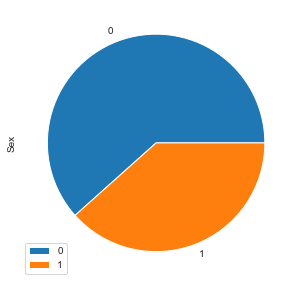

In [9]:
train.groupby(['Survived']).count().plot.pie(y='Sex', figsize=(5, 5))

Le taux de survie des femmes est trés éleves plus de 70%

#### Relation entre la variable cible 'Survived' et la variable 'pclass'

In [10]:
p=train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
p

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


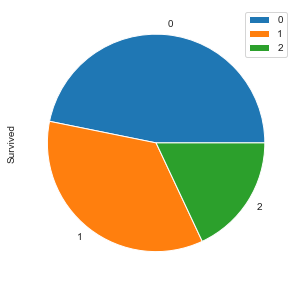

In [11]:
p.plot.pie(y='Survived', figsize=(5, 5))

Plus de la moité des passagers survivant sont de la première classe.

#### Relation entre la variable cible 'Survived' et la variable 'Embarked'

In [12]:
cEmbark=train[['Embarked', "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
cEmbark

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


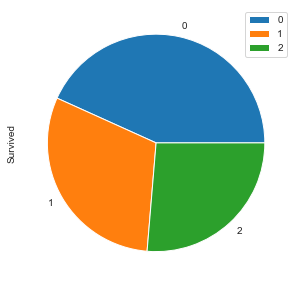

In [13]:
cEmbark.plot.pie(y='Survived', figsize=(5, 5))

La moitié des passagées qurvivants ont prix le porte d'embarquement 'C'

#### Relation entre la variable cible 'Survived' et la variable 'SibSip'

In [14]:
cSibSp=train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
cSibSp

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


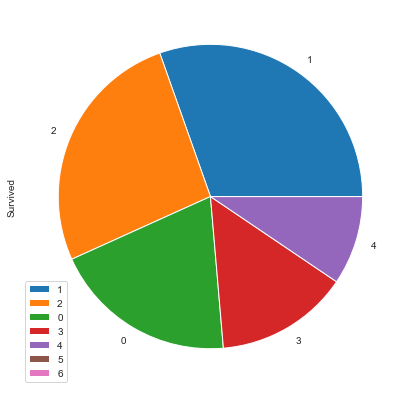

In [15]:
cSibSp.plot.pie(y='Survived', figsize=(7,7))

#### Relation entre la variable cible 'Survived' et la variable 'Parch'

In [16]:
cParch= train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
cParch

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


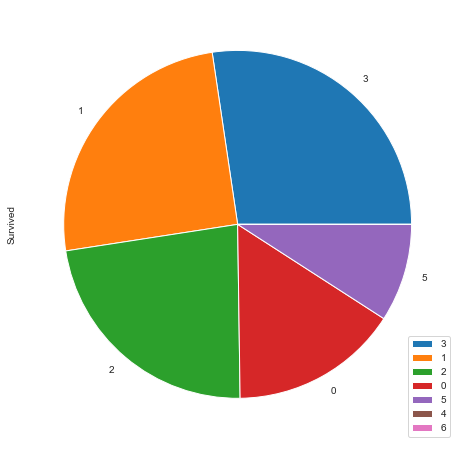

In [17]:
cParch.plot.pie(y='Survived', figsize=(8, 8))

#### Relation entre la variable cible 'Survived' et la variable 'Age'

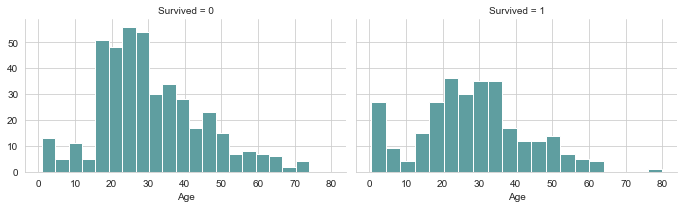

In [18]:
g_age = sns.FacetGrid(train, col='Survived', aspect=1.6)
g_age.map(plt.hist, 'Age', bins=20, color='cadetblue')

- Les nourrissons (âge <=4 ans) ont un taux de survie élevé.
- Les passagers les plus âgés (âge = 80 ans) ont survécu.
- Un grand nombre de jeunes de 15 à 25 ans n'ont pas survécu.
- La plupart des passagers survivants sont dans la tranche d'âge 15-35 ans.

#### Relation entre la variable cible 'Survived' et les variables : 'Age' et 'Pclass' 

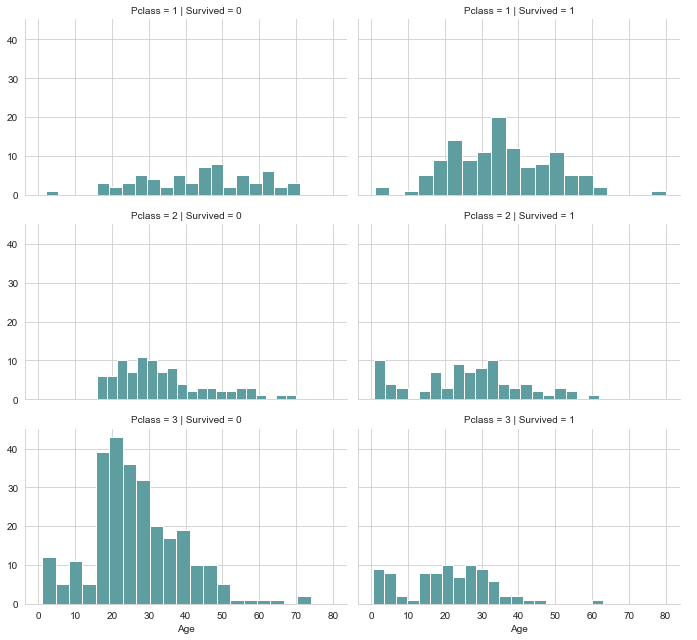

In [19]:
g_age_pclass = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
g_age_pclass.map(plt.hist, 'Age', bins=20, color='cadetblue')
g_age_pclass.add_legend();

- La classe P=3 a accueilli la plupart des passagers, mais la plupart n'ont pas survécu
- Les passagers en bas âge de la classe P=2 et P=3 ont pour la plupart survécu.
- La plupart des passagers en classe P=1 ont survécu.
- La classe P varie en fonction de la répartition des passagers par âge.

#### Relation entre la variable cible 'Survived' et les variables 'Embarked', 'sex' et 'fare'

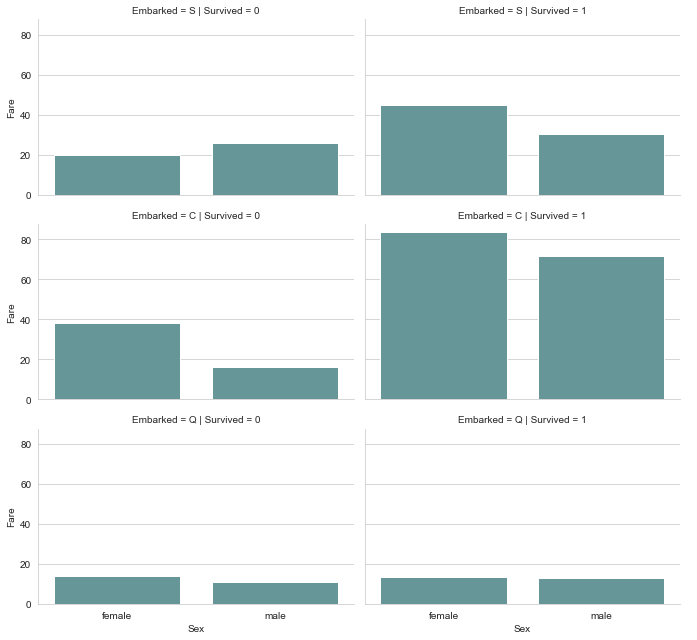

In [20]:
g_embarked = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
g_embarked.map(sns.barplot, 'Sex', 'Fare', ci=None, color='cadetblue')
g_embarked.add_legend()

- Les passagers qui on payè plus ont survecu.
- Le port d'embarquement est en corrélation avec le taux de survie.

In [21]:
train[train.Survived.notnull()].pivot_table(index=['Sex','Pclass'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [22]:
train[train.Survived.notnull()].pivot_table(index=['Sex','Embarked'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       S         0.174603
       Q         0.073171

In [23]:
train[train.Survived.notnull()].pivot_table(index=['Pclass','Embarked'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Pclass Embarked          
1      C         0.694118
2      Q         0.666667
1      S         0.582677
2      C         0.529412
1      Q         0.500000
2      S         0.463415
3      C         0.378788
       Q         0.375000
       S         0.189802

### V.3.  Suppression des variables inutiles 

In [23]:
#suppression des variables qui ne vont pas être très utiles pour la prédiction 
train = train.drop(['PassengerId','Name','Ticket', "Cabin"], axis=1)

### V.4. Traitement et imputtaion des valeurs maquantes

In [24]:
#imputation des valeurs maquante dans la variable 'age' par la médiane
train['Age'].fillna(train['Age'].median(), inplace=True)

#imputation des valeurs maquante dans la variable 'Fare' par la médiane
train['Fare'].fillna(train['Fare'].median(), inplace=True)

#imputation des valeurs maquante dans la variable 'Embarked' par le mode 'S'
train['Embarked'].fillna('S', inplace=True)

### V.5. Ajout des nouvelles variables :

Une variable binaire 'family' qui renvoie 1 si le passager est en famille en revoie 1 sinon 

In [25]:
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

In [26]:
cFamily= train[['Family', "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)
cFamily

,Family,Survived
1,1,0.505650
0,0,0.303538


Une variable 'gender' binaire qui renvoie child si l'age du passager est inferieur à 16ans à si adult 

In [27]:
def get_gender(passenger):
    age,sex = passenger
    return 'child' if age < 16 else 'adult'

In [28]:
train['gender'] = train[['Age','Sex']].apply(get_gender,axis=1)

In [29]:
train[train.Survived.notnull()].pivot_table(index=['Sex','gender'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Sex    gender          
female adult   0.756458
       child   0.651163
male   child   0.525000
       adult   0.163873

In [30]:
#verification
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,gender
0,0,3,male,22.0,1,0,7.2500,S,1,adult
1,1,1,female,38.0,1,0,71.2833,C,1,adult
2,1,3,female,26.0,0,0,7.9250,S,0,adult
3,1,1,female,35.0,1,0,53.1000,S,1,adult
4,0,3,male,35.0,0,0,8.0500,S,0,adult


### V.6 Traitement des variables catégorielles

#### - Pour la variable "Embarked" 

In [31]:
embarquement = pd.get_dummies(train['Embarked'])

In [32]:
train = train.join(embarquement)
train.drop(['Embarked'], axis=1,inplace=True)

#### - Pour la variable "Pclass"

In [33]:
pclasse  = pd.get_dummies(train['Pclass'])
pclasse.columns = ['Class_1','Class_2','Class_3']

In [34]:
train = train.join(pclasse)
train.drop(['Pclass'], axis=1,inplace=True)

#### - Pour la variable sex 

In [35]:
train["Sex"] = train["Sex"].map({"male": 0, "female":1})

#### - Pour la variable gender

In [36]:
ge = pd.get_dummies(train['gender'])

In [37]:
train = train.join(ge)
train.drop(['gender'], axis=1,inplace=True)

In [38]:
#vérification
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Family,C,Q,S,Class_1,Class_2,Class_3,adult,child
0,0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,1,1,0,0,1,0,0,1,0
2,1,1,26.0,0,0,7.9250,0,0,0,1,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,1,1,0,0,1,0
4,0,0,35.0,0,0,8.0500,0,0,0,1,0,0,1,1,0


In [39]:
#verification 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived    891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Family      891 non-null int64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
adult       891 non-null uint8
child       891 non-null uint8
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


## VI. Apprentissage 

### VI.1 Préparation des jeux de données 
* Créer un jeu d'apprentissage (70%) et un jeu de validation (3O%)
* Séparer la cible du reste des données

In [40]:
Y = train["Survived"]
X = train.drop("Survived",axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.3, random_state=42)

### VI.2 Modèle 1 : log-regression 

Comme premier modèle j'ai choisi le modèle de '**Régression logistic**' parceque notr evariable reponse est une variable binaire 

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### VI.3 Prédiction du modèle 1
Prédire la survie sur le jeu d'apprentissage puis sur le jeu de test

In [42]:
pred_logreg = logreg.predict(X_test)

### VI.4 Evaluation du modele 1

Utilisation des différentes métriques de sklearn.metrics pour évaluer les performances du modèle.

In [43]:
cm_logreg = confusion_matrix(Y_test, pred_logreg)
print(cm_logreg)
print("Precision {}".format(precision_score(Y_test, pred_logreg)))
print("Recall {}".format(recall_score(Y_test, pred_logreg)))

[[138  19]
 [ 31  80]]
Precision 0.8080808080808081
Recall 0.7207207207207207


In [44]:
print(metrics.classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### VI.5 Modèle 2 : Arbre de décision

Comme deuxième modèle, j'ai mis en place l'algorithme de classification par '**arbres de décision**'

In [45]:
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### VI.6 Prédiction du modèle 2

In [47]:
#prediction 
pred_decision_tree = decision_tree.predict(X_test)

### VI.7 Evaluation du modèle 2

In [48]:
# evaluation
cm_decision_tree = confusion_matrix(Y_test, pred_decision_tree)
print(cm_decision_tree)
print("Precision {}".format(precision_score(Y_test, pred_decision_tree)))
print("Recall {}".format(recall_score(Y_test, pred_decision_tree)))

[[140  17]
 [ 31  80]]
Precision 0.8247422680412371
Recall 0.7207207207207207


In [49]:
print(metrics.classification_report(Y_test, decision_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



### VII Conclusion

Les deux modèles sont précis à environ 80%. Mais le deuxième modèle '**arbre de décision**' semble plus pertinant par rapport au premier modèle. 